<a href="https://colab.research.google.com/github/AnveshAnnepaga/AI_DS/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection**

# I. Filter Methods

## **1 .Variance Threshold(ANOVA f-test)**

In [1]:
import pandas as pd
data = pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country':[1,1,1,1,1]
})

data

,age,salary,country
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [2]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(data)

selected_features=data.columns[selector.get_support()]

print('sle features:',selected_features)


sle features: Index(['age', 'salary'], dtype='object')


Scenario: Hospital Disease Prediction System
You are building a machine learning model to predict whether a patient has a particular disease.
The dataset contains the following features:
Age
Blood Pressure
Cholesterol Level
Gender
Country Code
Hospital ID
Machine Version Used for Testing
After initial exploration, you notice:
Country Code is 100% “India” for all records
Machine Version is 99% “v2.1” and only 1% “v2.2”
Hospital ID is same for all patients
❓ Question:
Which feature selection technique would you apply first?
Which features would likely be removed?
Why is removing these features important before training?
What problem might occur if you keep them?


In [10]:
import pandas as pd

data = {
    "Age": [45, 50, 37, 62, 29],
    "Blood_Pressure": [130, 140, 120, 150, 110],
    "Cholesterol": [220, 240, 180, 260, 170],
    "Gender": ["M", "F", "M", "F", "M"],
    "Country_Code": ["India", "India", "India", "India", "India"],  # constant
    "Hospital_ID": ["H001", "H001", "H001", "H001", "H001"],        # constant
    "Machine_Version": ["v2.1", "v2.1", "v2.1", "v2.2", "v2.1"],    # near constant
}

df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

Original Dataset:
   Age  Blood_Pressure  Cholesterol Gender Country_Code Hospital_ID  \
0   45             130          220      M        India        H001   
1   50             140          240      F        India        H001   
2   37             120          180      M        India        H001   
3   62             150          260      F        India        H001   
4   29             110          170      M        India        H001   

  Machine_Version  
0            v2.1  
1            v2.1  
2            v2.1  
3            v2.2  
4            v2.1  


In [11]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

print("\nEncoded Dataset:")
print(df_encoded)


Encoded Dataset:
   Age  Blood_Pressure  Cholesterol  Gender  Country_Code  Hospital_ID  \
0   45             130          220       1             0            0   
1   50             140          240       0             0            0   
2   37             120          180       1             0            0   
3   62             150          260       0             0            0   
4   29             110          170       1             0            0   

   Machine_Version  
0                0  
1                0  
2                0  
3                1  
4                0  


In [16]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)

X_selected = selector.fit_transform(df_encoded)


selected_features = df_encoded.columns[selector.get_support()]

df_selected = pd.DataFrame(X_selected, columns=selected_features)

print("\nSelected Features after Variance Threshold:")
print(df_selected.columns.tolist())

print("\nFinal Dataset:")
print(df_selected)


Selected Features after Variance Threshold:
['Age', 'Blood_Pressure', 'Cholesterol', 'Gender']

Final Dataset:
   Age  Blood_Pressure  Cholesterol  Gender
0   45             130          220       1
1   50             140          240       0
2   37             120          180       1
3   62             150          260       0
4   29             110          170       1


# **2.Correlation Coefficient**

In [32]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[20000,30000,40000,50000,60000]
})
data

,size_sqft,tiles_count,price
0,1000,100,20000
1,1500,150,30000
2,2000,200,40000
3,2500,250,50000
4,3000,300,60000


In [33]:
corr_matrix = data.corr()
corr_matrix

,size_sqft,tiles_count,price
size_sqft,1.0,1.0,1.0
tiles_count,1.0,1.0,1.0
price,1.0,1.0,1.0


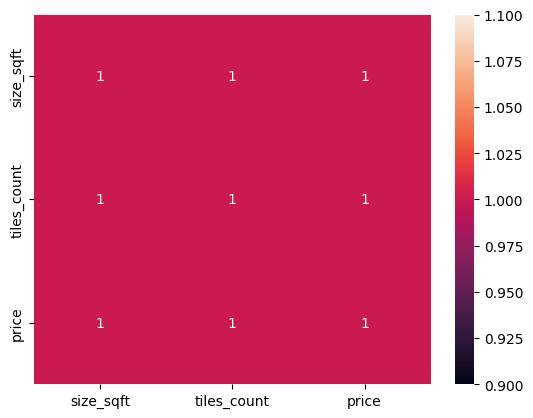

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_matrix,annot=True,fmt='g')
plt.show()

In [36]:
#removing highly correlated features (>0.9)
upper=corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column].abs()>0.9)]
print('highly correlated featurs to drop',to_drop)

highly correlated featurs to drop ['tiles_count', 'price']


🏠 Scenario: Real Estate Price Prediction
You are developing a regression model to predict house prices.

Dataset contains:

House Size (sqft)
Number of Tiles
Total Construction Cost
Number of Bedrooms
Market Price
After calculating correlation matrix,

you find:

House Size and Number of Tiles have 0.98 correlation
Construction Cost is highly correlated (0.95) with House Size

❓ Question:

Why is high correlation between features a problem?

Which feature(s) would you remove and why?

What issue can occur if highly correlated features are kept?

Which filter method is appropriate here?


In [37]:
import pandas as pd
import numpy as np

# Example dataset
data = pd.DataFrame({
    "House_Size": [1500, 1800, 2400, 3000, 3500],
    "Number_of_Tiles": [15000, 17800, 23900, 29800, 34900],
    "Construction_Cost": [200000, 240000, 310000, 400000, 460000],
    "Number_of_Bedrooms": [3, 3, 4, 4, 5],
    "Market_Price": [250000, 300000, 400000, 520000, 600000]
})


In [38]:
# Compute correlation matrix
corr_matrix = data.corr()

print("Correlation Matrix:\n")
print(corr_matrix)


Correlation Matrix:

                    House_Size  Number_of_Tiles  Construction_Cost  \
House_Size            1.000000         0.999953           0.999225   
Number_of_Tiles       0.999953         1.000000           0.999026   
Construction_Cost     0.999225         0.999026           1.000000   
Number_of_Bedrooms    0.954519         0.956763           0.943959   
Market_Price          0.999395         0.999275           0.999906   

                    Number_of_Bedrooms  Market_Price  
House_Size                    0.954519      0.999395  
Number_of_Tiles               0.956763      0.999275  
Construction_Cost             0.943959      0.999906  
Number_of_Bedrooms            1.000000      0.946002  
Market_Price                  0.946002      1.000000  


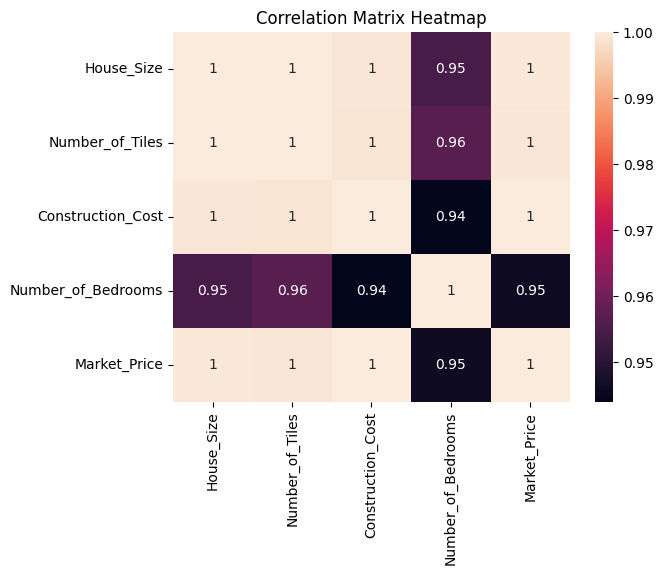

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [42]:

threshold = 0.95

corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Highly correlated features to remove:", to_drop)

data_reduced = data.drop(columns=to_drop)

print("\nRemaining features:")
print(data_reduced.head())


Highly correlated features to remove: ['Number_of_Tiles', 'Construction_Cost', 'Number_of_Bedrooms', 'Market_Price']

Remaining features:
   House_Size
0        1500
1        1800
2        2400
3        3000
4        3500


# **3.Chi-Square Test**

In [43]:
import pandas as pd
x=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[1000,2000,3000,4000,5000],

})
y=[0,1,1,0,1]
x

,gender,married,income
0,0,1,1000
1,1,1,2000
2,0,0,3000
3,1,0,4000
4,1,1,5000


In [48]:
#chi -square test requires non=negative values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(x)

selector = SelectKBest(score_func=chi2,k=2)
x_new = selector.fit_transform(x_scaled,y)

sele_features = x.columns[selector.get_support()]

sele_features

Index(['married', 'income'], dtype='object')

Scenario: Loan Approval Classification
You are building a classification model to predict whether a loan will be approved.

Dataset features:

Gender (Male/Female)
Marital Status (Yes/No)
Education Level (Graduate/Non-Graduate)
Applicant Income
Property Area (Urban/Rural)
Favorite Color
Loan Status (Approved/Rejected)
You want to identify which categorical features significantly influence loan approval.

❓ Question:

Which filter method is most appropriate here?

Which type of features can be tested using this method?

If “Favorite Color” has a very low chi-square score, what does it indicate?

Why is chi-square suitable only for classification problems?


In [63]:
# Chi-square test requires non-negative values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [64]:
data = pd.DataFrame({
    "Gender": ["Male", "Female", "Male", "Male", "Female", "Male"],
    "Marital_Status": ["Yes", "No", "Yes", "Yes", "No", "Yes"],
    "Education_Level": ["Graduate", "Graduate", "Non-Graduate", "Graduate", "Non-Graduate", "Graduate"],
    "Applicant_Income": [50000, 30000, 40000, 60000, 25000, 70000],
    "Property_Area": ["Urban", "Rural", "Urban", "Urban", "Rural", "Urban"],
    "Favorite_Color": ["Red", "Blue", "Green", "Red", "Blue", "Green"],
    "Loan_Status": ["Approved", "Rejected", "Approved", "Approved", "Rejected", "Approved"]
})


In [65]:
# Encode categorical variables
le = LabelEncoder()

for column in data.columns:
    data[column] = le.fit_transform(data[column])


In [66]:
data.head()

,Gender,Marital_Status,Education_Level,Applicant_Income,Property_Area,Favorite_Color,Loan_Status
0,1,1,0,3,1,2,0
1,0,0,0,1,0,0,1
2,1,1,1,2,1,1,0
3,1,1,0,4,1,2,0
4,0,0,1,0,0,0,1


In [67]:
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]


In [68]:
# Chi-square requires non-negative values
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Scale features to make them non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply Chi-Square feature selection
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X_scaled, y)

# Step 3: Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

# Step 4: View Chi-Square scores and p-values
chi_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": selector.scores_,
    "P-value": selector.pvalues_
})

print("\nChi-Square Scores:")
print(chi_scores.sort_values(by="Chi2 Score", ascending=False))


Selected Features:
Index(['Marital_Status', 'Property_Area'], dtype='object')

Chi-Square Scores:
            Feature  Chi2 Score   P-value
0            Gender        2.00  0.157299
1    Marital_Status        2.00  0.157299
4     Property_Area        2.00  0.157299
5    Favorite_Color        1.50  0.220671
3  Applicant_Income        0.96  0.327187
2   Education_Level        0.25  0.617075


#**II**.**Wrapper** **Methods**

### 1.forward selection

###2.backward selection

###3.RFE

In [71]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
print(x.head())
x.shape

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

(569, 30)

In [73]:
y=data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [84]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=150)
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')

sfs.fit(x_train, y_train)
selected_features=x_train.columns[sfs.get_support()]
print("Selected features are:",selected_features)

Selected features are: Index(['mean radius', 'mean area', 'worst texture', 'worst perimeter',
       'worst compactness'],
      dtype='object')


In [85]:
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')

sfs.fit(x_train, y_train)
selected_features=x_train.columns[sfs.get_support()]
print("Selected features are:",selected_features)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Selected features are: Index(['mean radius', 'worst radius', 'worst texture', 'worst perimeter',
       'worst concavity'],
      dtype='object')


In [86]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=100)
rfe = RFE(model,n_features_to_select=5)
rfe.fit(x_train,y_train)
selected_featues=x_train.columns[rfe.support_]
selected_featues

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Index(['mean concavity', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')